# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
134,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650,2
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,0
120,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625,1
109,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680,1
90,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480,1
44,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885,0
151,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480,2
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,2
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630,2
112,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607,1


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

#### Remove missing values

In [3]:
data.isna().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

#### Visualize features against classes

In [7]:
data.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline', 'WineVariety'],
      dtype='object')

In [13]:
data.columns[-1:].tolist()

['WineVariety']

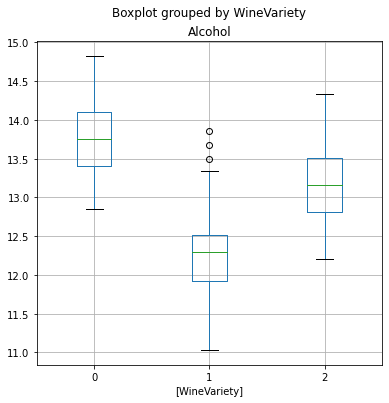

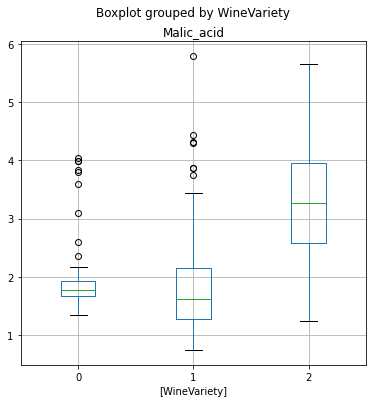

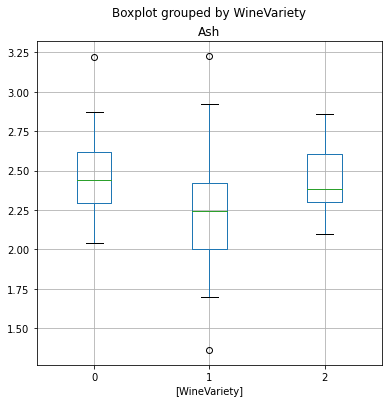

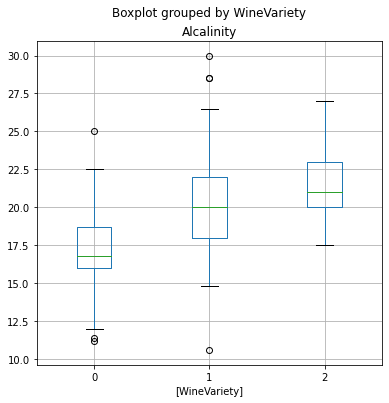

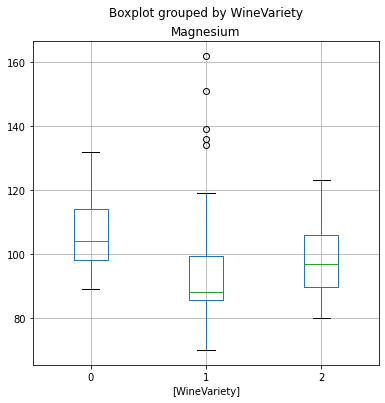

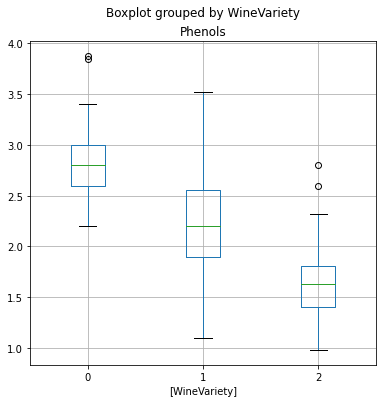

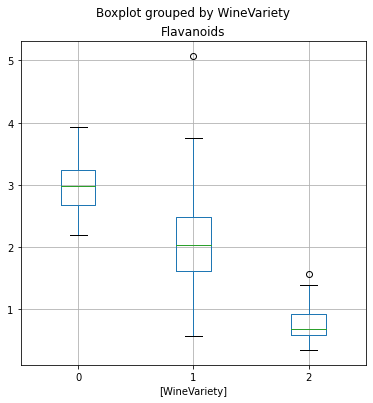

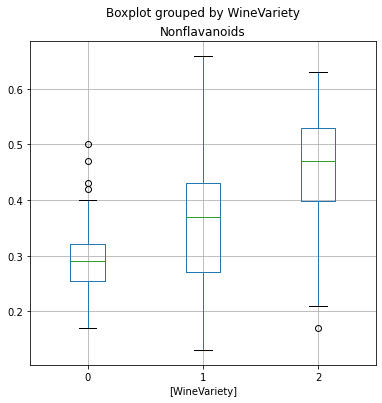

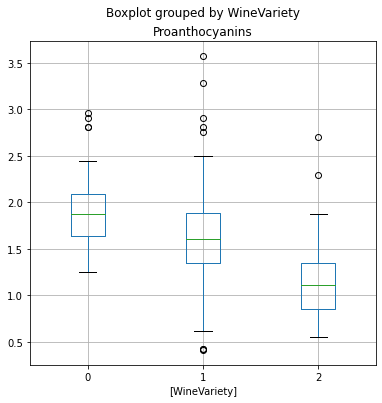

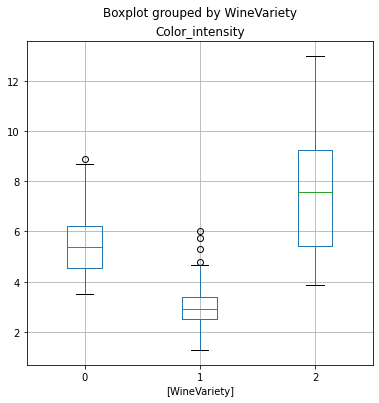

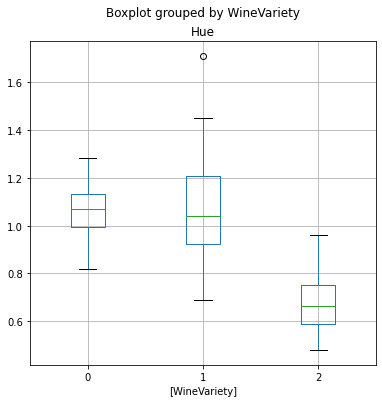

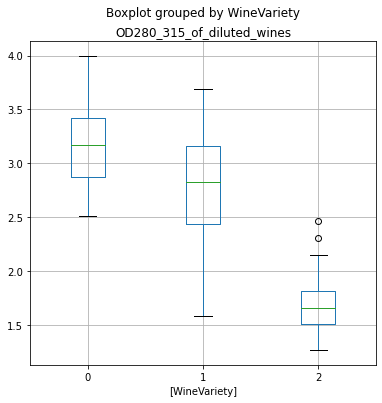

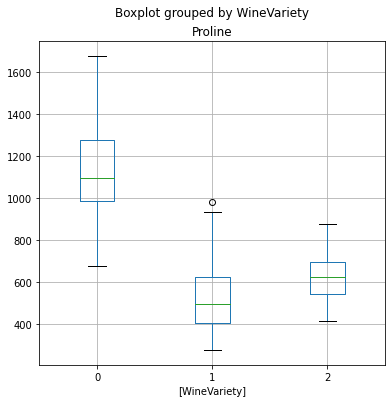

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

# Separate features and label
features = data.columns[0:len(data.columns)-1].tolist()
label = data.columns[-1:].tolist()

for col in features:
    data.boxplot(column=col, by=label, figsize=(6,6))
    plt.title(col)
plt.show()

#### Partition data

In [48]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X, y = data[features].values, data[label].values

# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=0,
                                                    stratify=y)

print ('Training Set: %d, Test Set: %d \n' % (x_train.shape[0], x_test.shape[0]))

Training Set: 124, Test Set: 54 



In [49]:
y_train.shape, y_test.shape

((124, 1), (54, 1))

In [46]:
~np.isnan(y_train.shape[1])

True

In [50]:
def flatten(array):
    try:
        if (~np.isnan(array.shape[1])):
            array = array.ravel()
    except:
            pass
            
    print(array.shape)
    return array
            
y_train = flatten(y_train)
y_test = flatten(y_test)

(124,)
(54,)


#### Apply a pipeline to preprocess data and perform classification using SVM

In [27]:
#import numpy as np
np.arange(len(data.columns)-1).tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [69]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric columns (scale them)
feature_columns = np.arange(len(data.columns)-1).tolist()
#feature_columns = [0,1,2,3,4,5,6]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(x_train, y_train)
print (multi_model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('preprocess',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])],
                                   

[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]
Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Average AUC: 1.0 



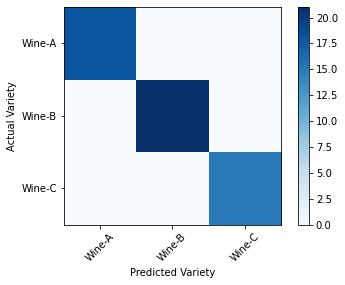

In [70]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score


# Get predictions from test data
predictions = multi_model.predict(x_test)
prob = multi_model.predict_proba(x_test)

classes = ['Wine-A', 'Wine-B', 'Wine-C']

# Print the confusion matrix
mcm = confusion_matrix(y_test, predictions)
print(mcm)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test, prob, multi_class='ovr'), '\n')

# Confusion matrix
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

In [63]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test, predictions)
print(mcm)

[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]


#### Train using logictic regression

In [71]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
#reg = 0.1

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])

# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(x_train, y_train)
print (multi_model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('preprocess',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])],
                                   

[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]
Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Average AUC: 1.0 



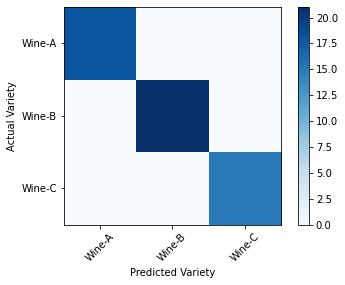

In [72]:
# Get predictions from test data
predictions = multi_model.predict(x_test)
prob = multi_model.predict_proba(x_test)

classes = ['Wine-A', 'Wine-B', 'Wine-C']

# Print the confusion matrix
mcm = confusion_matrix(y_test, predictions)
print(mcm)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test, prob, multi_class='ovr'), '\n')

# Confusion matrix
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


#### Save trained SVM model

In [56]:
import joblib

# Save the model as a pickle file
filename = './models/wine_model.pkl'
joblib.dump(multi_model, filename)

['./models/wine_model.pkl']

#### Save trained Logistic Regression model

In [60]:
# Save the model as a pickle file
filename = './models/wine_model_logit.pkl'
joblib.dump(multi_model, filename)

['./models/wine_model_logit.pkl']

#### Inference using SVM

In [57]:
# This time our input is an array of two feature arrays
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
         [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + classes[prediction] +')')

New samples:
[[1.372e+01 1.430e+00 2.500e+00 1.670e+01 1.080e+02 3.400e+00 3.670e+00
  1.900e-01 2.040e+00 6.800e+00 8.900e-01 2.870e+00 1.285e+03]
 [1.237e+01 9.400e-01 1.360e+00 1.060e+01 8.800e+01 1.980e+00 5.700e-01
  2.800e-01 4.200e-01 1.950e+00 1.050e+00 1.820e+00 5.200e+02]]
0 (Wine-A)
1 (Wine-B)


#### Inference using Logistic Regression

In [68]:
# This time our input is an array of two feature arrays
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
         [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + classes[prediction] +')')

New samples:
[[1.372e+01 1.430e+00 2.500e+00 1.670e+01 1.080e+02 3.400e+00 3.670e+00
  1.900e-01 2.040e+00 6.800e+00 8.900e-01 2.870e+00 1.285e+03]
 [1.237e+01 9.400e-01 1.360e+00 1.060e+01 8.800e+01 1.980e+00 5.700e-01
  2.800e-01 4.200e-01 1.950e+00 1.050e+00 1.820e+00 5.200e+02]]
0 (Wine-A)
1 (Wine-B)
